In [15]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score
from sklearn.metrics import precision_recall_fscore_support,average_precision_score
from sklearn.metrics import precision_score,recall_score,f1_score,precision_recall_curve

In [16]:
data = pd.read_csv("tictactoe.csv") 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
top-left-square         958 non-null object
top-middle-square       958 non-null object
top-right-square        958 non-null object
middle-left-square      958 non-null object
middle-middle-square    958 non-null object
middle-right-square     958 non-null object
bottom-left-square      958 non-null object
bottom-middle-square    958 non-null object
bottom-right-square     958 non-null object
Class                   958 non-null object
dtypes: object(10)
memory usage: 74.9+ KB


In [18]:
data.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [19]:
data.describe()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


In [20]:
y=data['Class']
y=y.to_frame()
y.head()


,Class
0,positive
1,positive
2,positive
3,positive
4,positive


In [21]:
X=data
X= X[['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square', 'middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square']]
X.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
0,x,x,x,x,o,o,x,o,o
1,x,x,x,x,o,o,o,x,o
2,x,x,x,x,o,o,o,o,x
3,x,x,x,x,o,o,o,b,b
4,x,x,x,x,o,o,b,o,b


In [22]:
#Applying Train,Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [23]:
combine=[X_train,X_test]
classmapping={'x':0,'o':1,'b':2}
for dt in combine:
   dt['top-left-square']=data['top-left-square'].map(classmapping)
X_train.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
528,2,o,x,x,x,x,b,o,o
744,1,x,x,x,o,o,b,x,o
721,0,b,o,x,o,x,o,b,b
113,0,o,x,x,x,o,x,o,o
822,1,o,o,x,o,x,b,x,x


In [24]:
combine=[X_train,X_test]
classmapping={'x':0,'o':1,'b':2}
for dt in combine:
   dt['top-middle-square']=data['top-middle-square'].map(classmapping)
X_train.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
528,2,1,x,x,x,x,b,o,o
744,1,0,x,x,o,o,b,x,o
721,0,2,o,x,o,x,o,b,b
113,0,1,x,x,x,o,x,o,o
822,1,1,o,x,o,x,b,x,x


In [25]:
combine=[X_train,X_test]
classmapping={'x':0,'o':1,'b':2}
for dt in combine:
   dt['top-right-square']=data['top-right-square'].map(classmapping)
X_train.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
528,2,1,0,x,x,x,b,o,o
744,1,0,0,x,o,o,b,x,o
721,0,2,1,x,o,x,o,b,b
113,0,1,0,x,x,o,x,o,o
822,1,1,1,x,o,x,b,x,x


In [26]:
combine=[X_train,X_test]
classmapping={'x':0,'o':1,'b':2}
for dt in combine:
   dt['middle-left-square']=data['middle-left-square'].map(classmapping)
X_train.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
528,2,1,0,0,x,x,b,o,o
744,1,0,0,0,o,o,b,x,o
721,0,2,1,0,o,x,o,b,b
113,0,1,0,0,x,o,x,o,o
822,1,1,1,0,o,x,b,x,x


In [27]:
combine=[X_train,X_test]
classmapping={'x':0,'o':1,'b':2}
for dt in combine:
   dt['middle-middle-square']=data['middle-middle-square'].map(classmapping)
X_train.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
528,2,1,0,0,0,x,b,o,o
744,1,0,0,0,1,o,b,x,o
721,0,2,1,0,1,x,o,b,b
113,0,1,0,0,0,o,x,o,o
822,1,1,1,0,1,x,b,x,x


In [28]:
combine=[X_train,X_test]
classmapping={'x':0,'o':1,'b':2}
for dt in combine:
   dt['middle-right-square']=data['middle-right-square'].map(classmapping)
X_train.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
528,2,1,0,0,0,0,b,o,o
744,1,0,0,0,1,1,b,x,o
721,0,2,1,0,1,0,o,b,b
113,0,1,0,0,0,1,x,o,o
822,1,1,1,0,1,0,b,x,x


In [29]:
combine=[X_train,X_test]
classmapping={'x':0,'o':1,'b':2}
for dt in combine:
   dt['middle-right-square']=data['middle-right-square'].map(classmapping)
X_train.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
528,2,1,0,0,0,0,b,o,o
744,1,0,0,0,1,1,b,x,o
721,0,2,1,0,1,0,o,b,b
113,0,1,0,0,0,1,x,o,o
822,1,1,1,0,1,0,b,x,x


In [30]:
combine=[X_train,X_test]
classmapping={'x':0,'o':1,'b':2}
for dt in combine:
   dt['bottom-left-square']=data['bottom-left-square'].map(classmapping)
X_train.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
528,2,1,0,0,0,0,2,o,o
744,1,0,0,0,1,1,2,x,o
721,0,2,1,0,1,0,1,b,b
113,0,1,0,0,0,1,0,o,o
822,1,1,1,0,1,0,2,x,x


In [31]:
combine=[X_train,X_test]
classmapping={'x':0,'o':1,'b':2}
for dt in combine:
   dt['bottom-middle-square']=data['bottom-middle-square'].map(classmapping)
X_train.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
528,2,1,0,0,0,0,2,1,o
744,1,0,0,0,1,1,2,0,o
721,0,2,1,0,1,0,1,2,b
113,0,1,0,0,0,1,0,1,o
822,1,1,1,0,1,0,2,0,x


In [32]:
combine=[X_train,X_test]
classmapping={'x':0,'o':1,'b':2}
for dt in combine:
   dt['bottom-right-square']=data['bottom-right-square'].map(classmapping)
X_train.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
528,2,1,0,0,0,0,2,1,1
744,1,0,0,0,1,1,2,0,1
721,0,2,1,0,1,0,1,2,2
113,0,1,0,0,0,1,0,1,1
822,1,1,1,0,1,0,2,0,0


In [33]:
combine=[y_train,y_test]
classmapping={'positive':0,'negative':1}
for dt in combine:
   dt['Class']=data['Class'].map(classmapping)
y_train.head()

,Class
528,0
744,1
721,1
113,0
822,1


In [34]:
#AdaBoost
clf =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
clf.fit(X_train, y_train)  

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [35]:
y_pred = clf.predict(X_test)  

In [36]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0])

In [37]:
y_test.head()

,Class
260,0
11,0
250,0
416,0
932,1


In [38]:
print(confusion_matrix(y_test, y_pred))  

[[182   4]
 [ 39  63]]


In [39]:
print(classification_report(y_test, y_pred))  

             precision    recall  f1-score   support

          0       0.82      0.98      0.89       186
          1       0.94      0.62      0.75       102

avg / total       0.86      0.85      0.84       288



In [59]:
accuracy_test_ada=round(clf.score(X_test,y_test)*100,2)
accuracy_train_ada=round(clf.score(X_train,y_train)*100,2)
accuracy_ada=round(accuracy_score(y_test, y_pred)*100,2)
print('Training accuracy of Ada Boosted Decision Tree',accuracy_train_ada)
print('Testing accuracy of Ada Boosted Decision Tree',accuracy_test_ada)
print('Accuracy of Ada Boosted Decision Tree:',accuracy_ada)
accuracy_ada1=accuracy_score(y_test, y_pred)


Training accuracy of Ada Boosted Decision Tree 100.0
Testing accuracy of Ada Boosted Decision Tree 92.01
Accuracy of Ada Boosted Decision Tree: 92.01


In [60]:
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['positive','negative'], 
                     columns = ['positive','negative'])

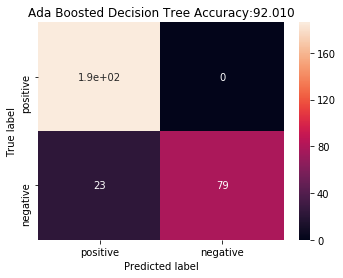

In [61]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Ada Boosted Decision Tree Accuracy:{0:.3f}'.format(accuracy_test_ada))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [62]:
pprf1 = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Ada Boosted Decision Tree precision_recall_fscore_support ", pprf1)
pps1 = precision_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("Ada Boosted Decision Tree precision_score -> %.2f"%pps1)
prs1 = recall_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("Ada Boosted Decision Tree recall_score -> %.2f"%prs1)
pf1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("f1_score",f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None))
print('Ada Boosted Decision Tree f1 score -> %.2f'%pf1)

Ada Boosted Decision Tree precision_recall_fscore_support  (0.9449760765550239, 0.8872549019607843, 0.9073501643471572, None)
Ada Boosted Decision Tree precision_score -> 0.94
Ada Boosted Decision Tree recall_score -> 0.89
f1_score 0.9073501643471572
Ada Boosted Decision Tree f1 score -> 0.91


In [63]:
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
y_pred = clf.predict(X_test)  

In [65]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0])

In [66]:
y_test.head()

,Class
260,0
11,0
250,0
416,0
932,1


In [67]:
print(confusion_matrix(y_test, y_pred))  

[[186   0]
 [ 19  83]]


In [68]:
print(classification_report(y_test, y_pred))  

             precision    recall  f1-score   support

          0       0.91      1.00      0.95       186
          1       1.00      0.81      0.90       102

avg / total       0.94      0.93      0.93       288



In [69]:
accuracy_test_rf=round(clf.score(X_test,y_test)*100,2)
accuracy_train_rf=round(clf.score(X_train,y_train)*100,2)
accuracy_rf=round(accuracy_score(y_test, y_pred)*100,2)
print('Training accuracy of RandomForestClassifier:',accuracy_train_rf)
print('Testing accuracy of RandomForestClassifier:',accuracy_test_rf)
print('Accuracy of RandomForestClassifier:',accuracy_rf)
accuracy_rf2=accuracy_score(y_test, y_pred)

Training accuracy of RandomForestClassifier: 100.0
Testing accuracy of RandomForestClassifier: 93.4
Accuracy of RandomForestClassifier: 93.4


In [70]:
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['positive','negative'], 
                     columns = ['positive','negative'])

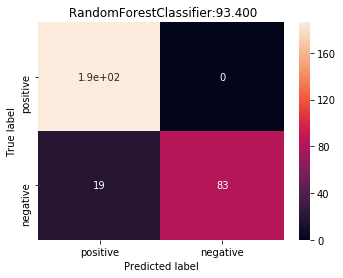

In [71]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(' RandomForestClassifier:{0:.3f}'.format(accuracy_test_rf))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [72]:
pprf2 = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("RandomForestClassifier precision_recall_fscore_support ", pprf2)
pps2 = precision_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("RandomForestClassifier precision_score -> %.2f"%pps2)
prs2 = recall_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("RandomForestClassifier recall_score -> %.2f"%prs2)
pf12=f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("f1_score",f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None))
print('RandomForestClassifier f1 score -> %.2f'%pf12)

RandomForestClassifier precision_recall_fscore_support  (0.9536585365853658, 0.9068627450980392, 0.9243519734568328, None)
RandomForestClassifier precision_score -> 0.95
RandomForestClassifier recall_score -> 0.91
f1_score 0.9243519734568328
RandomForestClassifier f1 score -> 0.92


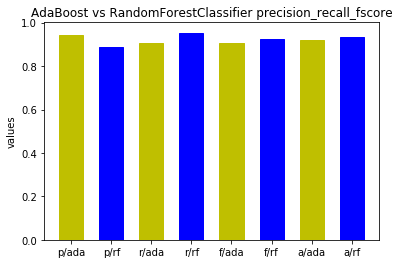

In [78]:
barlist=plt.bar(['p/ada','p/rf','r/ada','r/rf','f/ada','f/rf','a/ada','a/rf'],[pps1,prs1,pf1,pps2,prs2,pf12,accuracy_ada1,accuracy_rf2],align='center', alpha=1.0,width=.6)
barlist[0].set_color('y')
barlist[2].set_color('y')
barlist[4].set_color('y')
barlist[6].set_color('y')
barlist[1].set_color('b')
barlist[3].set_color('b')
barlist[5].set_color('b')
barlist[7].set_color('b')
plt.ylabel('values')
plt.title('AdaBoost vs RandomForestClassifier precision_recall_fscore')
plt.show()
